M
#Dataset from kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prachityagi06","key":"475db766483deedcc037a809e1f1b157"}'}

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle
#copying the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/
#permissions of the file
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                          title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset          Customer Shopping (Latest Trends) Dataset      76KB  2024-11-23 15:26:12           5964        113  1.0              
mujtabamatin/air-quality-and-pollution-assessment            Air Quality and Pollution Assessment           84KB  2024-12-04 15:29:51           1338         34  1.0              
ikynahidwin/depression-student-dataset                       Depression Student Dataset                      4KB  2024-11-20 06:42:01           4413         78  1.0              
steve1215rogg/student-lifestyle-dataset                      student lifestyle dataset                   

In [4]:
import kaggle

kaggle.api.dataset_download_files('vipoooool/new-plant-diseases-dataset', path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


M
##Importing Libraries


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

M
#Data Preprocessing


M
##Training Image preprocessing


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


M
##Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


M
#Building Model

In [8]:
cnn = tf.keras.models.Sequential()

M
##Building Convolution Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))


In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

M
##Compiling and Training Phase

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      12,289,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,058,762 (65.07 MB)

 Trainable params: 17,058,762 (65.07 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 163s 67ms/step - accuracy: 0.4466 - loss: 1.9584 - val_accuracy: 0.8346 - val_loss: 0.5121
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.8512 - loss: 0.4686 - val_accuracy: 0.9140 - val_loss: 0.2711
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.9156 - loss: 0.2651 - val_accuracy: 0.9383 - val_loss: 0.1915
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.9428 - loss: 0.1728 - val_accuracy: 0.9327 - val_loss: 0.2204
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.9555 - loss: 0.1351 - val_accuracy: 0.9358 - val_loss: 0.2053
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 195s 62ms/step - accuracy: 0.9669 - loss: 0.1015 - val_accuracy: 0.9505 - val_loss: 0.1648
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - accuracy: 0.9706 - loss: 0.0905 - val_accuracy: 0.9542 - val_loss: 0.1484
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 

**M**
##Evaluating Model

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9889 - loss: 0.0326
Training accuracy: 0.9909524321556091


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9583 - loss: 0.1531
Validation accuracy: 0.9594240784645081


M
#Saving Model

In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
from google.colab import files
files.download('trained_plant_disease_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
training_history.history #Return Dictionary of history

{'accuracy': [0.638352632522583,
  0.8728501200675964,
  0.9231666326522827,
  0.9468098878860474,
  0.9599260091781616,
  0.9693719148635864,
  0.9729852676391602,
  0.9782630205154419,
  0.9809659123420715,
  0.9827157258987427],
 'loss': [1.2217336893081665,
  0.4000263810157776,
  0.2395021617412567,
  0.16329191625118256,
  0.1219203993678093,
  0.09514976292848587,
  0.0826612114906311,
  0.0664866715669632,
  0.06079328432679176,
  0.05208178237080574],
 'val_accuracy': [0.8345663547515869,
  0.9140109419822693,
  0.9383109211921692,
  0.9326769709587097,
  0.9358069896697998,
  0.9505463242530823,
  0.954245388507843,
  0.9396198391914368,
  0.94514000415802,
  0.9594240784645081],
 'val_loss': [0.5120852589607239,
  0.27112677693367004,
  0.19148699939250946,
  0.22043782472610474,
  0.2053203135728836,
  0.16479048132896423,
  0.14840252697467804,
  0.22252969443798065,
  0.19426009058952332,
  0.14539597928524017]}

In [29]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


M
##Accuracy Visualization

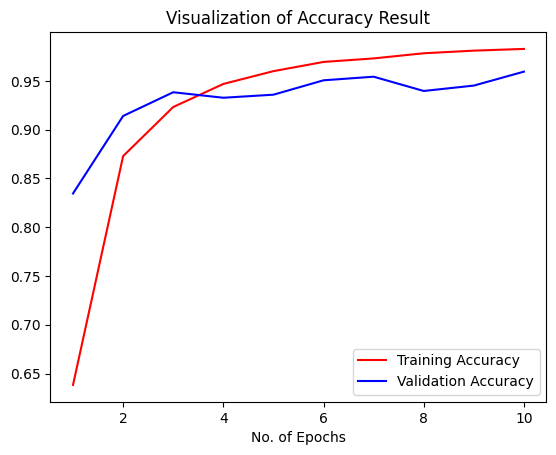

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

M
##Some other metrics for model evaluation


In [32]:
class_name = validation_set.class_names

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.99      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.90      1.00      0.94       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.94      1.00      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.92      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

M
##Confusion Matrix Visualization

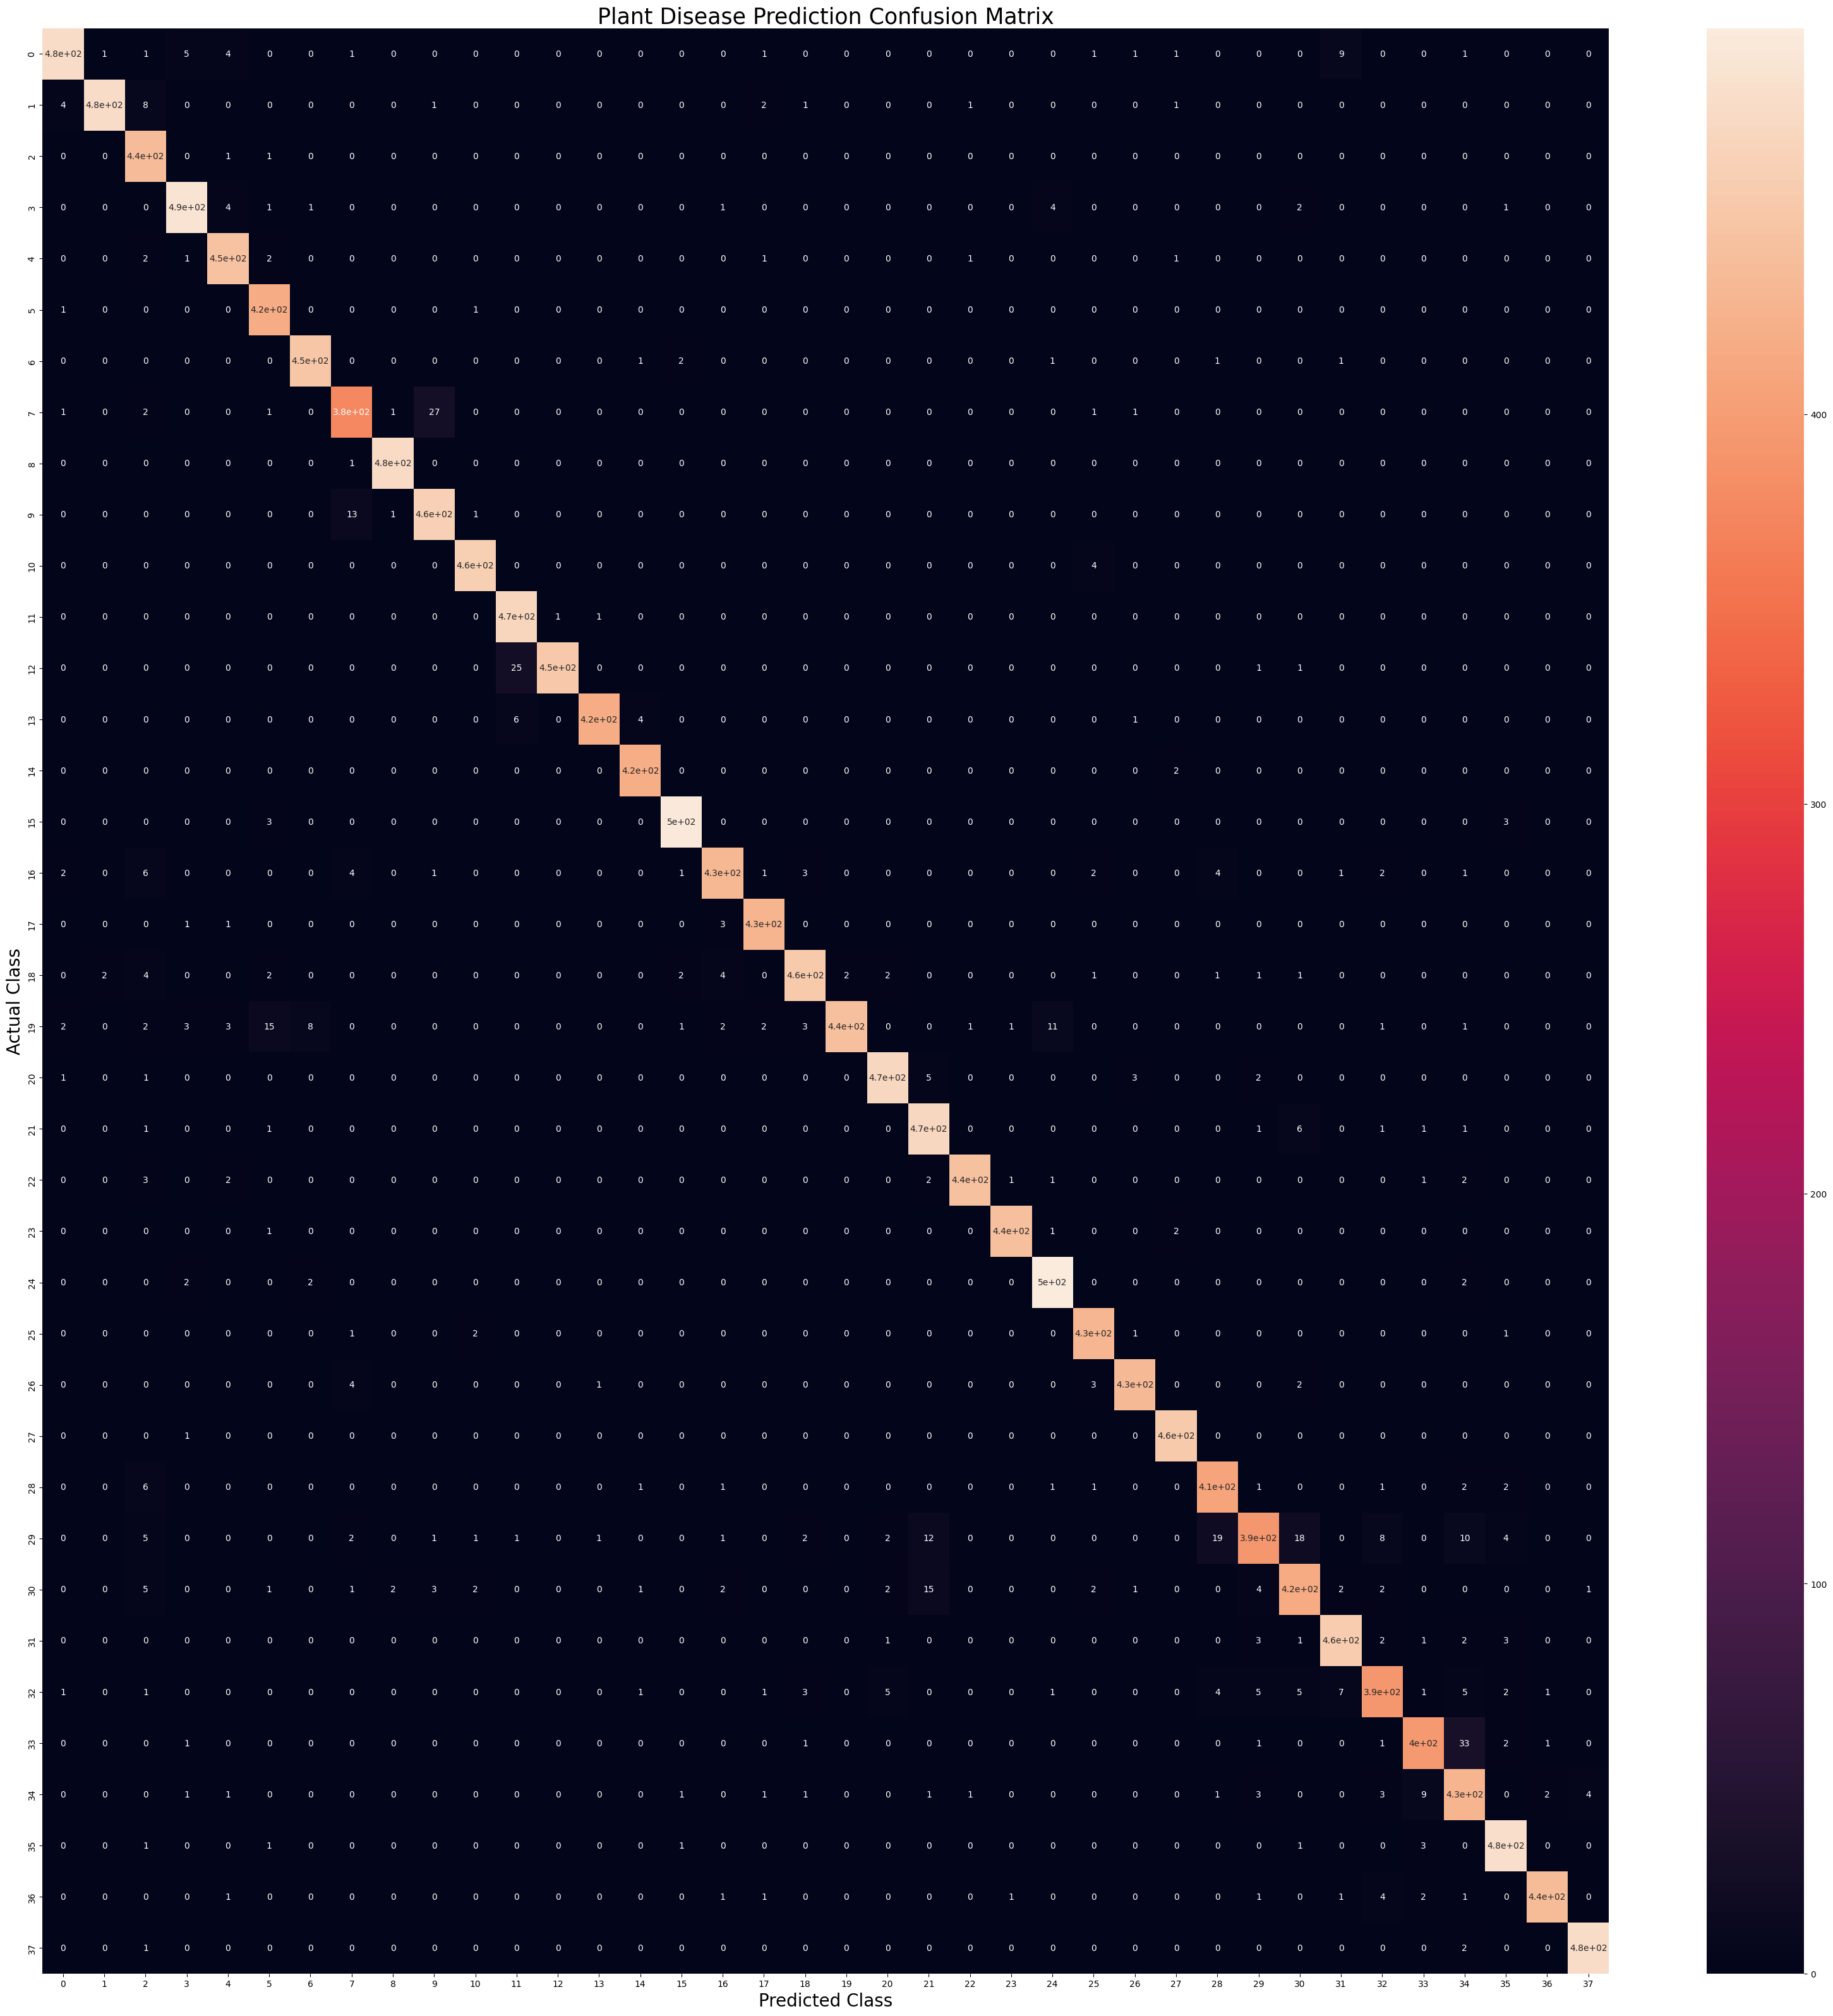

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()